In [19]:
#Imports

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0,'..')
from datautils.dataloader import tokenize_sequence

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

## Import data

In [34]:
trainset = "../data/Deeploc/train.npz"
testset = "../data/Deeploc/test.npz"
is_raw = False


test_data = np.load(testset)
train_data = np.load(trainset)

# Test set
X_test = test_data['X_test']
y_test = test_data['y_test']
mask_test = test_data['mask_test']
mem_test = test_data['mem_test'].astype(np.int32)
unk_test = test_data['unk_test'].astype(np.int32)

# Training set
X_train = train_data['X_train']
y_train = train_data['y_train']
mask_train = train_data['mask_train']
partition = train_data['partition']
mem_train = train_data['mem_train']
unk_train = train_data['unk_train']

print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)

tick_marks = np.arange(10)
classes = ['Nucleus','Cytoplasm','Extracellular','Mitochondrion','Cell membrane','ER',
           'Chloroplast','Golgi apparatus','Lysosome','Vacuole']

X_train.shape (11083, 1000, 20)
X_test.shape (2773, 1000, 20)


In [35]:
# Some of the raw sequences have amino acids that are not part of the "core 20", so we remove those
if is_raw:
    X_train, mask = tokenize_sequence(X_train)
    X_train = np.asarray(X_train)
    y_train = y_train[mask]
    mask_train = mask_train[mask]
    partition = partition[mask]
    mem_train = mem_train[mask]
    unk_train = unk_train[mask]

    X_test, mask = tokenize_sequence(X_test)
    X_test = np.asarray(X_test)
    y_test = y_test[mask]
    mask_test = mask_test[mask]
    mem_test = mem_test[mask]
    unk_test = unk_test[mask]

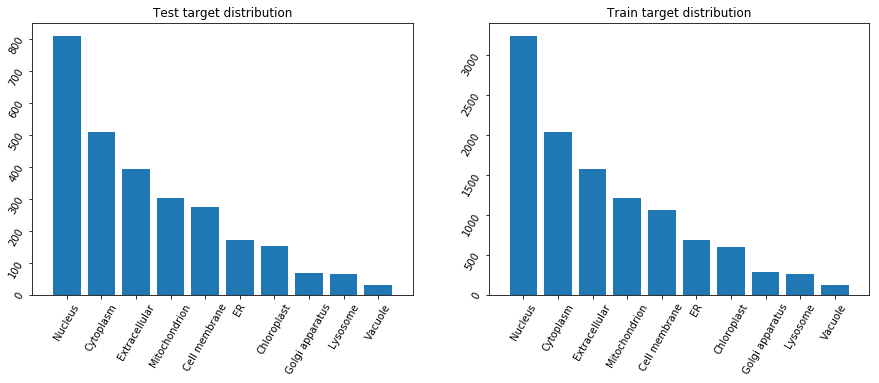

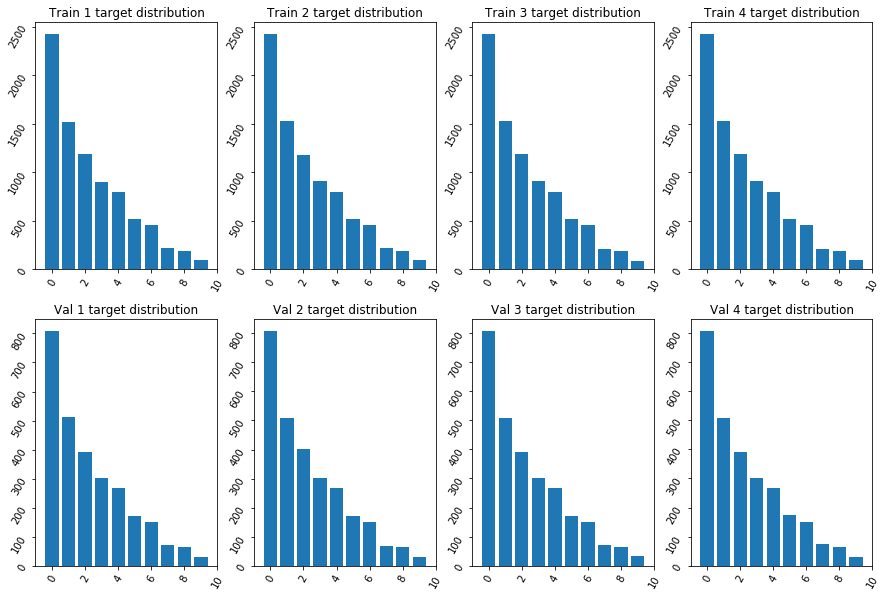

In [79]:
test_targets_counts = np.bincount(y_test)
train_targets_counts = np.bincount(y_train)

fig, ax = plt.subplots(1, 2,figsize=(15,5))
plt.setp(ax, xticks=tick_marks, xticklabels=classes)


# Test
ax[0].title.set_text('Test target distribution')
ax[0].bar(range(10), test_targets_counts, width=0.8, align='center')
ax[0].set(xlim=[-1, 10])
ax[0].tick_params(rotation=60)

# Train
ax[1].title.set_text('Train target distribution')
ax[1].bar(range(10), train_targets_counts, width=0.8, align='center')
ax[1].set(xlim=[-1, 10])
ax[1].tick_params(rotation=60)

plt.show()

# 5 partitions
fig, ax = plt.subplots(2, 4,figsize=(15,10))
for i in range(1,5):
    train_index = np.where(partition != i)
    val_index = np.where(partition == i)
    
    train_targets_counts = np.bincount(y_train[train_index].astype(np.int32))
    val_targets_counts = np.bincount(y_train[val_index].astype(np.int32))
    
    ax[0,i-1].title.set_text('Train {} target distribution'.format(i))
    ax[0,i-1].bar(range(10), train_targets_counts, width=0.8, align='center')
    ax[0,i-1].set(xlim=[-1, 10])
    ax[0,i-1].tick_params(rotation=60)

    # Train
    ax[1,i-1].title.set_text('Val {} target distribution'.format(i))
    ax[1,i-1].bar(range(10), val_targets_counts, width=0.8, align='center')
    ax[1,i-1].set(xlim=[-1, 10])
    ax[1,i-1].tick_params(rotation=60)
    
    